# US Airlines' On-Time Performance 2008
## by Serdar Celebi


> Data gathered from https://community.amstat.org/jointscsg-section/dataexpo/dataexpo2009 to understand the flight patterns of the US domestic airlines between 1988 and 2008. But in this study, only the year 2008 will be examined.

In [211]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bz2
import csv
import glob
import os, json
import datetime, time

%matplotlib inline

In [212]:
df_2008 = pd.read_csv(r"C:\Users\serda\Downloads\communicate-data-project-template\Project Template\2008.csv.bz2",compression='bz2')
df_2008

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009723,2008,12,13,6,1002.0,959,1204.0,1150,DL,1636,...,6.0,45.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009724,2008,12,13,6,834.0,835,1021.0,1023,DL,1637,...,5.0,23.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009725,2008,12,13,6,655.0,700,856.0,856,DL,1638,...,24.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,13.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [213]:
df_2008.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7009728.0,7.009728e+06,7.009728e+06,7.009728e+06,6.873482e+06,7.009728e+06,6.858079e+06,7.009728e+06,7.009728e+06,6.855029e+06,...,7.009728e+06,6.858079e+06,6.872670e+06,7.009728e+06,7.009728e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06
mean,2008.0,6.375130e+00,1.572801e+01,3.924182e+00,1.333830e+03,1.326086e+03,1.481258e+03,1.494801e+03,2.224200e+03,1.273224e+02,...,7.263870e+02,6.860852e+00,1.645305e+01,1.960618e-02,2.463006e-03,1.577206e+01,3.039031e+00,1.716462e+01,7.497434e-02,2.077098e+01
std,0.0,3.406737e+00,8.797068e+00,1.988259e+00,4.780689e+02,4.642509e+02,5.052251e+02,4.826728e+02,1.961716e+03,7.018731e+01,...,5.621018e+02,4.933649e+00,1.133280e+01,1.386426e-01,4.956753e-02,4.009912e+01,1.950287e+01,3.189495e+01,1.837940e+00,3.925964e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,9.280000e+02,9.250000e+02,1.107000e+03,1.115000e+03,6.220000e+02,7.700000e+01,...,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.320000e+03,1.512000e+03,1.517000e+03,1.571000e+03,1.100000e+02,...,5.810000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.728000e+03,1.715000e+03,1.909000e+03,1.907000e+03,3.518000e+03,1.570000e+02,...,9.540000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.743000e+03,1.379000e+03,...,4.962000e+03,3.080000e+02,4.290000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [214]:
df_2008.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               136246
CRSDepTime                 0
ArrTime               151649
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                83365
ActualElapsedTime     154699
CRSElapsedTime           844
AirTime               154699
ArrDelay              154699
DepDelay              136246
Origin                     0
Dest                       0
Distance                   0
TaxiIn                151649
TaxiOut               137058
Cancelled                  0
CancellationCode     6872294
Diverted                   0
CarrierDelay         5484993
WeatherDelay         5484993
NASDelay             5484993
SecurityDelay        5484993
LateAircraftDelay    5484993
dtype: int64

In [215]:
df_2008.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [216]:
print(df_2008.shape)
print(df_2008.dtypes)

(7009728, 29)
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object


In [217]:
df_2008['UniqueCarrier'].unique()

array(['WN', 'XE', 'YV', 'OH', 'OO', 'UA', 'US', 'DL', 'EV', 'F9', 'FL',
       'HA', 'MQ', 'NW', '9E', 'AA', 'AQ', 'AS', 'B6', 'CO'], dtype=object)

### What is the structure of your dataset?

> There are 7,009,728 records of flight data in 2008 dataset recorded to show 29 different unique features of an on-time performance. Most variables are numeric time and time related variables recorded as floats should me converted to datetime type. Since the total size of all the files is 1.5 GB, despite trying to merge them under a single file was not successful.
At this time it is not possible to do a time series analysis. Columns like CancellationCode, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay missing around 5.5 million rows of data so even though they will not be in scope for this study, it is worth mentioning. DepTime (136246), ArrTime (151649),TailNum (83365), ActualElapsedTime (154699), AirTime (154699), ArrDelay (154699), DepDelay (136246), TaxiIn (151649), TaxiOut (137058) also amongst the columns that are missing data but not as bad as the first batch of the columns. 

### What are the main feature(s) of interest in your dataset?

> I am most interested in figuring out if the delays are connected to a specific origin or destination also if there would be any attachment to a carrier or delays occur on a specific day of the week.

### What features in the dataset do you think will help support your investigation into your features of interest?

> DayOfWeek, DepTime, ArrTime, UniqueCarrier, AirTime, ArrDelay, DepDelay ,Distance, Origin and Dest columns would be the most important data for me to bring my analyses together. 

## Univariate Exploration

> Starting with the data type conversion then working with the dayofweek variable to see if there is any special day for the delay to occur

<ipython-input-218-851701de5e83>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels(['0','00:00','05:00','10:00','15:00','20:00','23:59']);


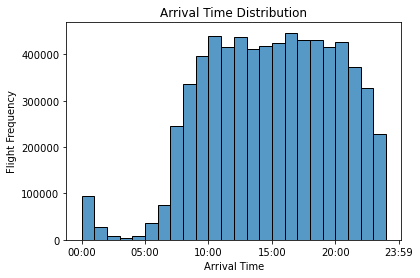

In [218]:
import seaborn as sns

a = sns.histplot(x='ArrTime',data = df_2008, binwidth=100)
a.set_xticklabels(['0','00:00','05:00','10:00','15:00','20:00','23:59']);
a.set_xlabel("Arrival Time", fontsize = 10)
a.set_ylabel("Flight Frequency", fontsize = 10)
plt.title('Arrival Time Distribution')
plt.show()

In [219]:
# get the mean of airtime
df_2008.AirTime.mean()

104.0185891263188

> Average time spent on air was 104 mins in 2008 by all the airlines


In [220]:
colors = sns.color_palette()[0]

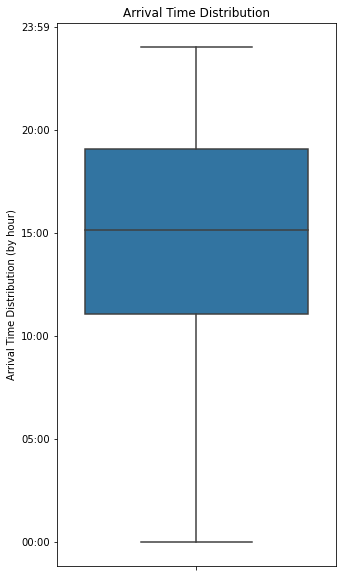

In [221]:
plt.figure(figsize=[5, 10])
sns.boxplot(y="ArrTime", data=df_2008, color=colors, showfliers=False)
plt.ylabel('Arrival Time Distribution (by hour)')
plt.yticks([0, 500,1000,1500,2000,2500],['00:00','05:00','10:00','15:00','20:00','23:59'])
plt.title('Arrival Time Distribution')
plt.show();

> Most US Domestic flights arrive between around 11 am and until 11 pm. This is when the flights are most common. After around 10 pm, flight frequency starts to go down. In fact, 75% of the whole flights arriving to an airport arrives between 11 am and midnight.

<ipython-input-222-b517817cea83>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['0','00:00','05:00','10:00','15:00','20:00','23:59']);


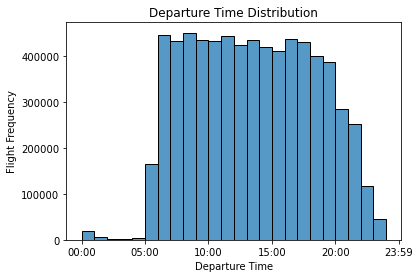

In [222]:
g = sns.histplot(x='DepTime',data = df_2008, binwidth=100)
g.set_xticklabels(['0','00:00','05:00','10:00','15:00','20:00','23:59']);
g.set_xlabel("Departure Time", fontsize = 10)
g.set_ylabel("Flight Frequency", fontsize = 10)
plt.title('Departure Time Distribution');

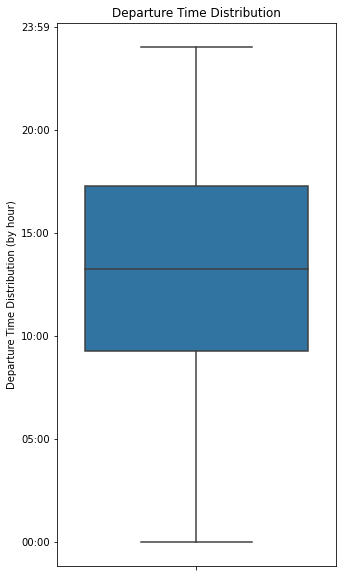

In [223]:
plt.figure(figsize=[5, 10])
sns.boxplot(y="DepTime", data=df_2008, color=colors, showfliers=False)
plt.ylabel('Departure Time Distribution (by hour)')
plt.yticks([0, 500,1000,1500,2000,2500],['00:00','05:00','10:00','15:00','20:00','23:59'])
plt.title('Departure Time Distribution')
plt.show();

> In conjunction with the findings in the first graph, in the departure flights graph, the flights leave as early as 5 am will arrive around 8 am as it is shown in the arriving flights graph. In fact, 75% of the whole flights departing from an airport leaves between 9 am and 11 pm. 

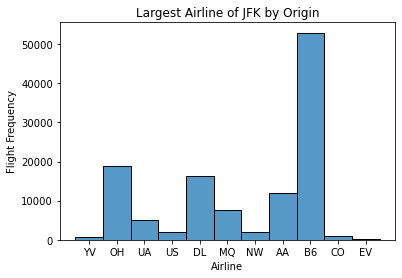

In [247]:
airport = df_2008[df_2008['Origin'] == 'JFK'] 

b = sns.histplot(x='UniqueCarrier',data = airport, binwidth=100)
b.set_xlabel("Airline", fontsize = 10)
b.set_ylabel("Flight Frequency", fontsize = 10)
plt.title('Largest Airline of JFK by Origin')
plt.show()


> The biggest carrier of JFK as of 2008 was JetBlue(B6) Airlines. 

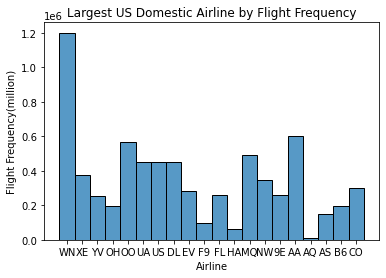

In [248]:
m = sns.histplot(x='UniqueCarrier',data = df_2008, binwidth=100)
m.set_xlabel("Airline", fontsize = 10)
m.set_ylabel("Flight Frequency(million)", fontsize = 10);
plt.title('Largest US Domestic Airline by Flight Frequency')
plt.show()

> The largest carrier by flight frequency in 2008 was Southwest Airlines(WN). The airline had almost 1.2 million flights in the year of 2008 by far the farther from the second most flying airline.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The analyses I conducted are around the variables UniqueCarrier, ArrTime, and DepTime focusing on the finding the carrier who flew in to JFK airport in 2008 and the distribution of Arrival and Departure Times in all the US airports.Arrival and Departure Flights distribution is consistent among both variables as departures start early and followed by arrivals.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Since I did not touch the variables that are missing the most values, I see no reason to make any changes on them. What I did was to understand the data in the dataset and work with the given values. In terms of the most flown carrier(Southwest Airlines, 1.2 million flights) and the carrier who flies the most in JFK (JetBlue, around 55000 flights) are shown themselves. Also 75% of the flights arriving are between 11 am and midnight and for the departing flights that variable goes down to between 9 am and 11 pm. 

## Bivariate Exploration

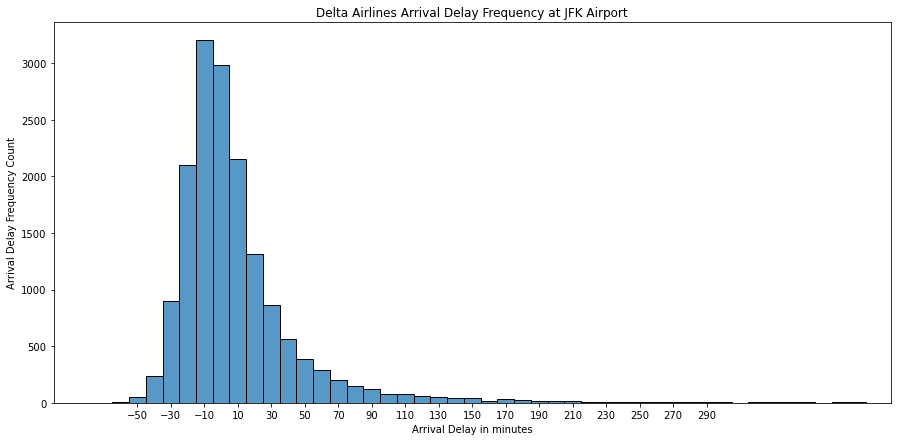

In [258]:
carrier = df_2008[(df_2008['UniqueCarrier'] == 'DL') & (df_2008['Dest'] == 'JFK')] 


bins = np.arange(-15, 15+1, 1)
plt.figure(figsize=[15, 7])

h = sns.histplot(x='ArrDelay',data = carrier, binwidth=10)
plt.xlim(-100,400)
plt.xticks(np.arange(-50, 300, 20))
h.set_xlabel("Arrival Delay in minutes", fontsize = 10)
h.set_ylabel("Arrival Delay Frequency Count", fontsize = 10)
plt.title('Delta Airlines Arrival Delay Frequency at JFK Airport')
plt.show()


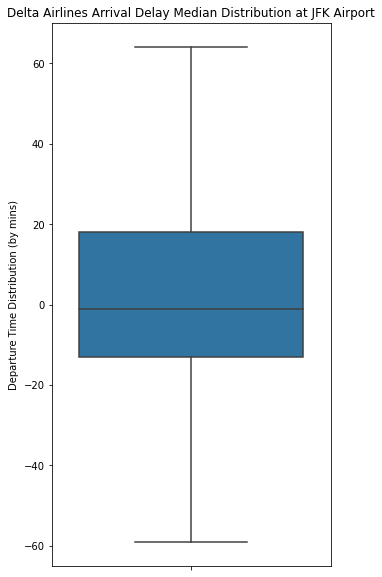

In [257]:
#adding boxplot for DL
plt.figure(figsize=[5, 10])
sns.boxplot(y="ArrDelay", data=carrier, color=colors, showfliers=False)
plt.ylabel('Departure Time Distribution (by mins)')
plt.title('Delta Airlines Arrival Delay Median Distribution at JFK Airport')
plt.show()

> Median delay 25 mins for DL JFK arrival. Why I wanted to look at the median value? BC outliers in the previous chart

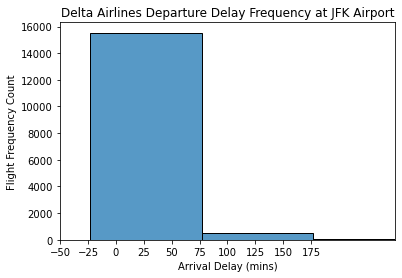

In [253]:
DL = df_2008[(df_2008['UniqueCarrier'] == 'DL') & (df_2008['Dest'] == 'JFK') ] 

l = sns.histplot(x='DepDelay',data = DL, binwidth=100)
plt.xlim(-25,250)
plt.xticks(np.arange(-50, 200, 25))
l.set_xlabel("Arrival Delay (mins)", fontsize = 10)
l.set_ylabel("Flight Frequency Count", fontsize = 10)
plt.title('Delta Airlines Departure Delay Frequency at JFK Airport')
plt.show()

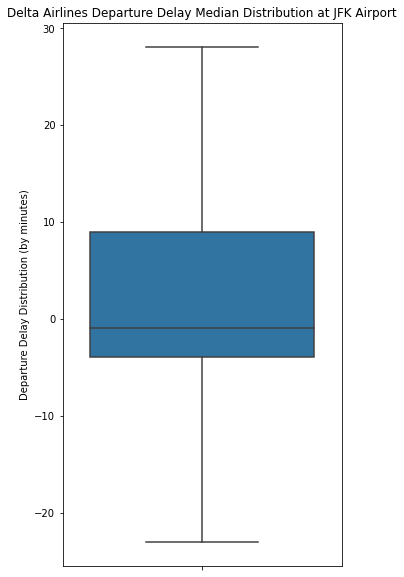

In [259]:
#adding boxplot for DL
plt.figure(figsize=[5, 10])
sns.boxplot(y="DepDelay", data=carrier, color=colors, showfliers=False)
plt.ylabel('Departure Delay Distribution (by minutes)')
plt.title('Delta Airlines Departure Delay Median Distribution at JFK Airport')
plt.show()

In [260]:
#Calculating the mean distrbution of the least delayed airline
df_veysel=df_2008.groupby('UniqueCarrier')['DepDelay'].mean().nsmallest(5).reset_index(name='num_delays')
df_veysel

,UniqueCarrier,num_delays
0,AQ,-1.397783
1,HA,0.455201
2,US,5.717490
3,F9,5.919602
4,NW,6.463236


In [231]:
#Adding another column to exclude the delays shorter than 5 mins to exclude small amounts
df_2008['Delayed'] = df_2008['DepDelay'].apply(lambda x : 1 if x > 5 else 0)


In [232]:
df_2008.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayed
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0,1


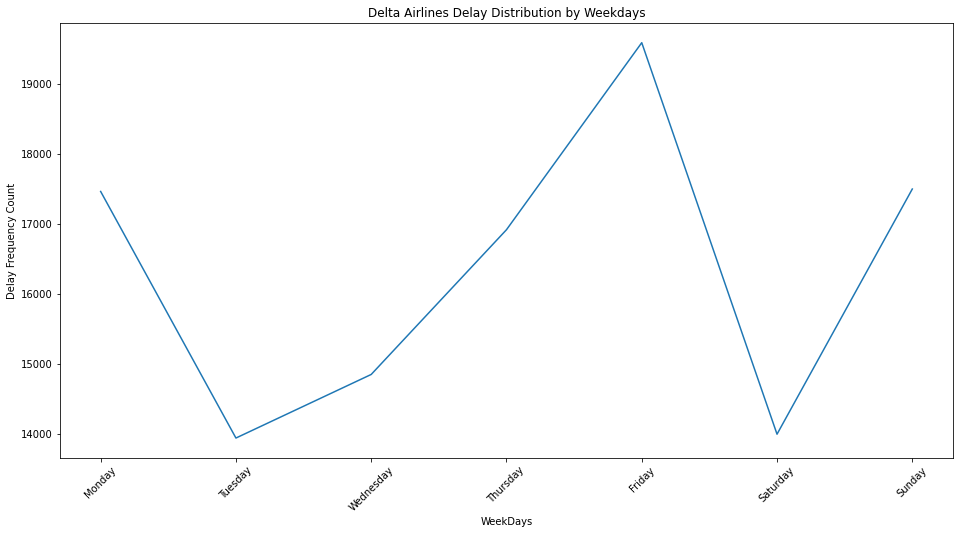

In [261]:
# Subset for carrier selected by user and rows with a delay.
df_delay = df_2008[(df_2008['UniqueCarrier'] == 'DL') & (df_2008['Delayed'] ==1)]

# Determine total number of delay minutes by day.
df_delay = df_delay.groupby('DayOfWeek')['Delayed'].sum()

# Plot delay minutes by month for selected airline.
plt.figure(figsize=(16, 8))
plt.plot(df_delay)
plt.ylabel('Delay Frequency Count')
plt.xlabel('WeekDays')
plt.xticks([1,2,3,4,5,6,7],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],rotation=45)
plt.title('Delta Airlines Delay Distribution by Weekdays')
plt.show()

In [234]:
#Average Us Airline delays
df_2008.Delayed.mean()

0.2762957421457723

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Most delays occur on Fridays! This is the same for arrival and departure due to departure delays creates a domino affect and like a chain reaction arrival delays also occur. 

> Most Delta Airlines flights delays occur during departure times. This maybe due to the airline may not want to leave a customer behind so they may have delayed the flights from the actual departure times. Interesting enough that the same airline has so many flights that arrive up to 50 mins early to JFK. This may be due to the airport is one of its hubs.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes. Although it is very likely but still the small airliens tend to have less delays. Top 3 of the least delayed flights in minutes belong to 3 airlines we may have never heard of.

## Multivariate Exploration


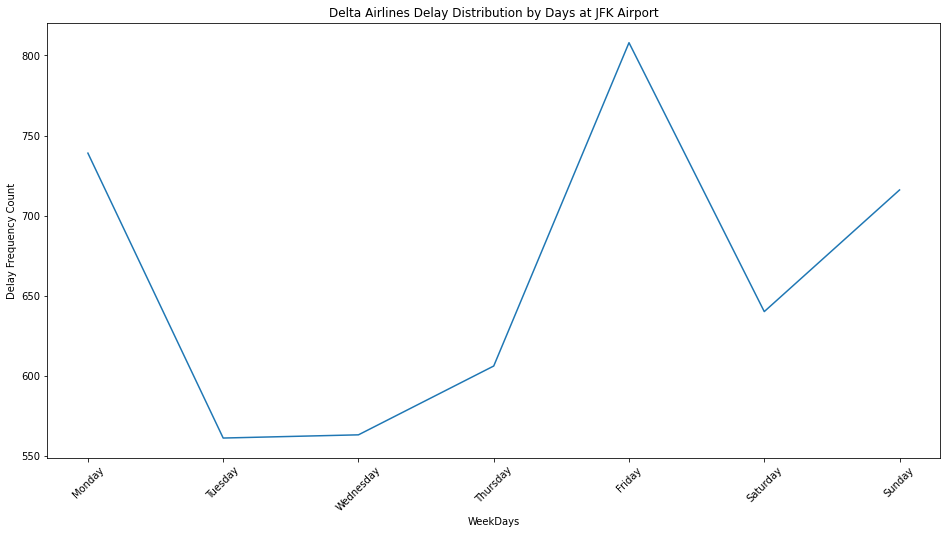

In [262]:
# Subset for carrier selected by user and rows with a delay.
df_delay2 = df_2008[(df_2008['UniqueCarrier'] == 'DL') & (df_2008['Delayed'] ==1) & (df_2008['Dest'] == 'JFK')]

# Determine total number of delay minutes by day.
df_delay2 = df_delay2.groupby('DayOfWeek')['Delayed'].sum()

# Plot delay minutes by month for selected airline.
plt.figure(figsize=(16, 8))
plt.plot(df_delay2)
plt.xticks([1,2,3,4,5,6,7],['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],rotation=45)
plt.title('Delta Airlines Delay Distribution by Days at JFK Airport')
plt.ylabel('Delay Frequency Count')
plt.xlabel('WeekDays')
plt.show()

> On a Friday night at JFK the most delayed flights got delayed around 40 mins for inbound flights.

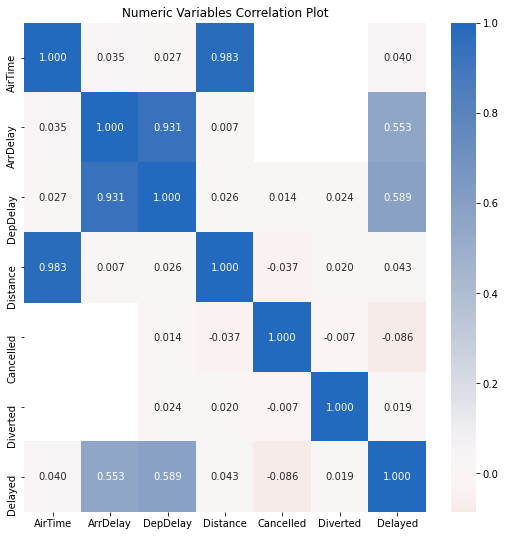

In [241]:
numeric_vars = [ 'AirTime', 'ArrDelay', 
                'DepDelay', 'Distance', 
                'Cancelled', 'Diverted', 'Delayed']
plt.figure(figsize = [9, 9])
sns.heatmap(df_2008[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Numeric Variables Correlation Plot')
plt.show()

> As we can see, nothing major to observe or unusual here, mainly we have these expected correlations:
DepDelay with ArrDelay, which will cause delay for next flight since Delayed depends on DepDelay


In [244]:
# taking a sample of 1,000,000 instead of using the whole 7,000,000 records since it'd be so intensive to plot
samp = df_2008.sample(1000000)

C:\Users\serda\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


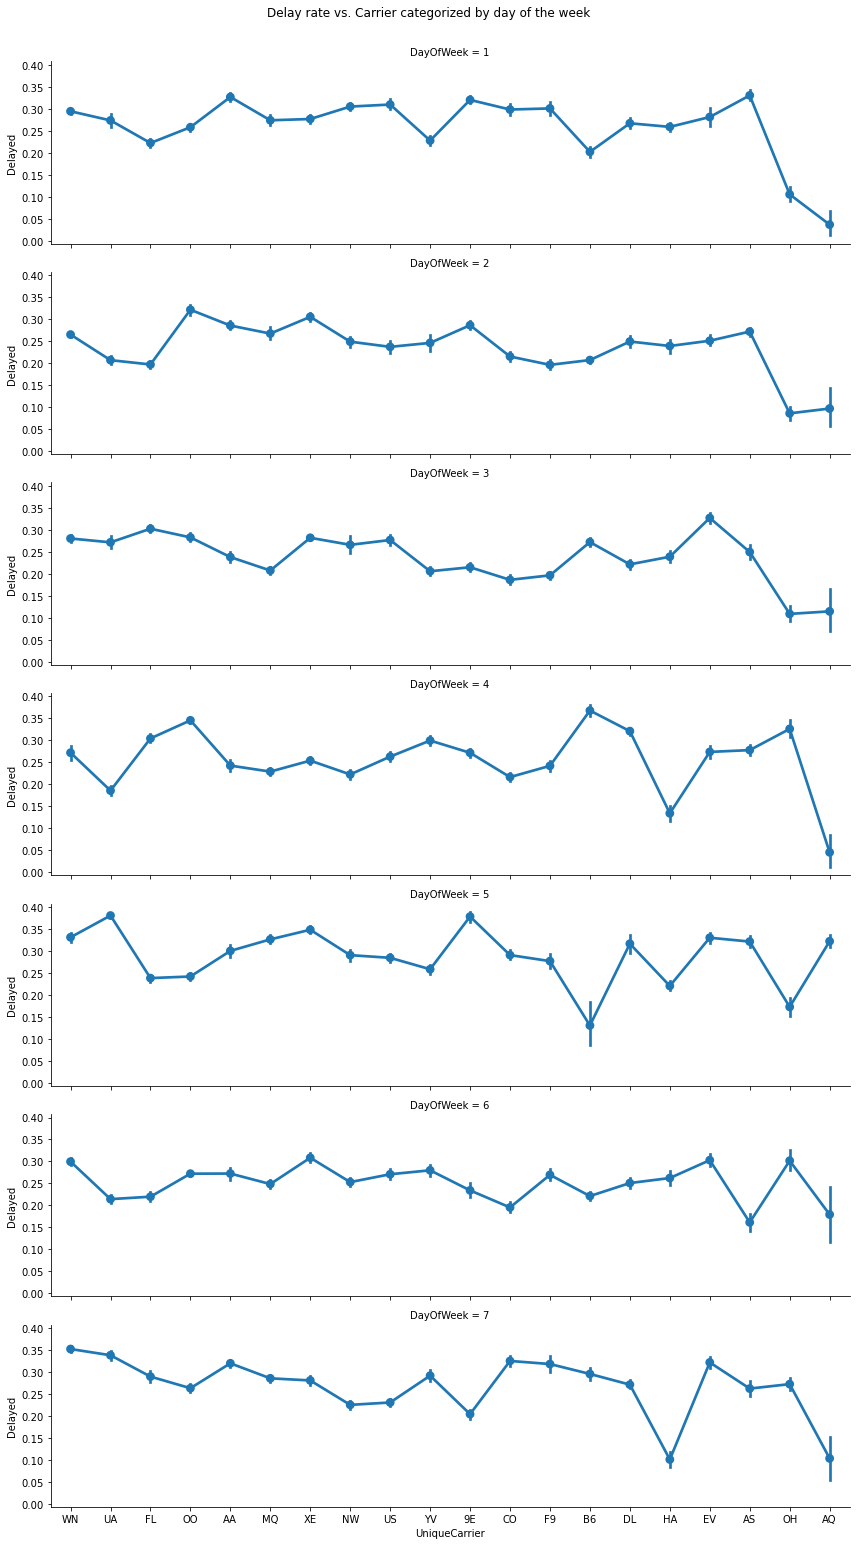

In [246]:
# o = sns.FacetGrid(data=df_2008, col='DayOfWeek',x='UniqueCarrier', hue= 'ArrDelay', col_wrap=1, aspect=4)
# o = o.map(sns.scatterplot)
# o.fig.suptitle('Delay rate vs. Carrier categorized by day of the week');

# Delayed, DayOfWeek, UniqueCarrier
g = sns.FacetGrid(data=samp, col='DayOfWeek', col_wrap=1, aspect=4)
g.map(sns.pointplot, 'UniqueCarrier', 'Delayed')
g.fig.suptitle('Delay rate vs. Carrier categorized by day of the week', y=1.02);


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It is safe to say that almost half of Delta Airlines most delayed day of Friday happens to be at JFK Airport! 
Other than that the way that departure times were affecting flights delay rate didn't change when categorized them by the day of the week. Which supports what we observed before about the strong relationship between departure times and flights delay rates.

### Were there any interesting or surprising interactions between features?

> Yes, some carriers seem to act differently based on the day of the week while some others are consistent. This might be due to the fact that some carriers are following consistent professional working standards while others tend to be less professional by the end of the week.